In [1]:
# install.packages("FactoMineR", repos="https://cloud.r-project.org/")
library(FactoMineR)
library(reshape)

In [2]:
dat_ansiedad=read.csv("ansiedad.csv",header = FALSE)
colnames(dat_ansiedad)=c("tw_de","tw_para","freq")
# dat_ansiedad

In [3]:
lex_cont_tbl=cast(dat_ansiedad, tw_de ~ tw_para, value="freq")
row.names(lex_cont_tbl)=lex_cont_tbl[,1]
lex_cont_tbl[,1]=NULL

In [4]:
lex_cont_tbl

,Miedo,Preocupación,Presión,Vulnerable,Vulnerables
Arauca,0,0,0,0,1
Barranquilla,0,0,0,0,2
Bogotá,7,0,2,0,11
Bucaramanga,0,0,0,2,1
Cali,1,2,1,0,1
Cúcuta,0,0,1,0,0
Ibagué,0,1,0,0,2
Medellín,2,0,0,1,3
Montería,0,0,0,1,8
Neiva,0,0,1,0,0


In [5]:
ca2 = CA(lex_cont_tbl, graph = FALSE)

Warning message in CA(lex_cont_tbl, graph = FALSE):
"The rows Tunja sum at 0. They were suppressed from the analysis"

In [6]:
summary(ca2)
summary(ca2, nbelements=Inf, file="out_CA.txt")
desc_tab=dimdesc(ca2)


Call:
CA(X = lex_cont_tbl, graph = FALSE) 

The chi square of independence between the two variables is equal to 110.2969 (p-value =  0.0002891261 ).

Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4
Variance               0.515   0.348   0.312   0.221
% of var.             36.902  24.938  22.321  15.840
Cumulative % of var.  36.902  61.840  84.160 100.000

Rows (the 10 first)
                Iner*1000     Dim.1     ctr    cos2     Dim.2     ctr    cos2  
Arauca        |     9.081 |  -0.267   0.175   0.099 |  -0.380   0.525   0.201 |
Barranquilla  |    18.162 |  -0.267   0.349   0.099 |  -0.380   1.050   0.201 |
Bogotá        |   106.819 |   0.346   5.895   0.284 |  -0.260   4.921   0.160 |
Bucaramanga   |   102.605 |  -1.072   8.463   0.425 |   1.188  15.389   0.522 |
Cali          |   156.441 |   1.044  13.402   0.441 |  -0.045   0.037   0.001 |
Cúcuta        |   187.342 |   3.016  22.347   0.615 |   2.182  17.309   0.322 |
Ibagué        |    57.677 |   0.143   0.151

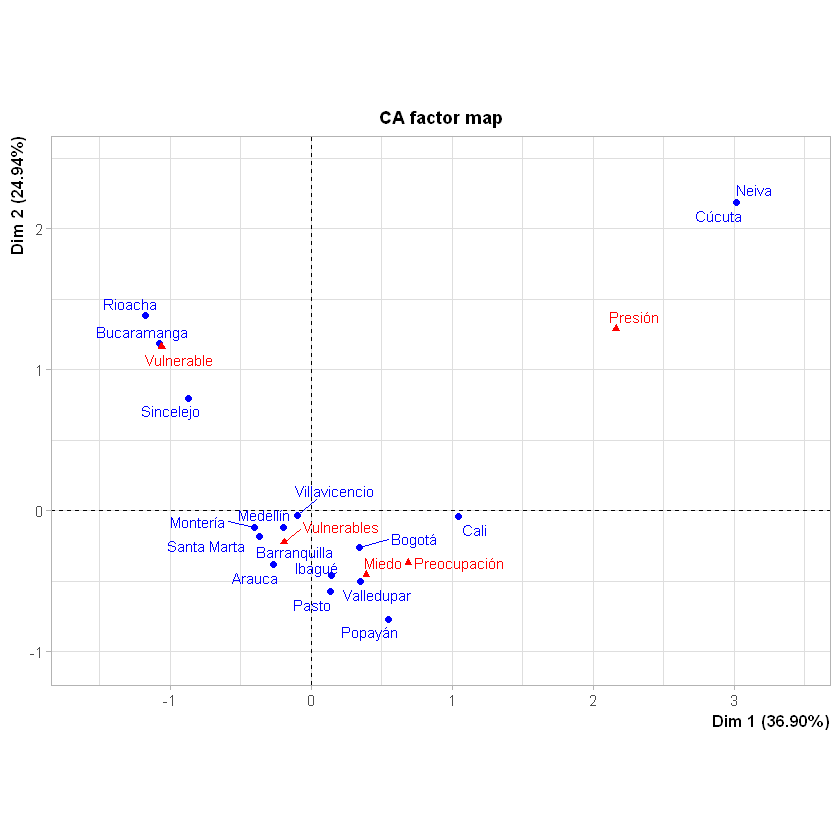

In [7]:
plot(ca2,
    shadowtext=TRUE,
    unselect=.95,
    cex=.8,
    selectRow="contrib 25"
    )

In [8]:
coords=rbind(data.frame(ca2$col$coord[,c(1,2)]),data.frame(ca2$row$coord[,c(1,2)]))
colnames(coords)=c("x_pos","y_pos")

In [9]:
write.csv(coords, "nodes_coords.csv", fileEncoding ="UTF-8")

In [10]:
coords

,x_pos,y_pos
Miedo,0.39260086,-0.45414042
Preocupación,0.69131567,-0.37108380
Presión,2.16471202,1.28751393
Vulnerable,-1.05796375,1.16344226
Vulnerables,-0.19139809,-0.22419017
Arauca,-0.26665352,-0.37994025
Barranquilla,-0.26665352,-0.37994025
Bogotá,0.34636403,-0.26014397
Bucaramanga,-1.07151279,1.18782820
Cali,1.04448590,-0.04507430
